# Trabajo semanal N°2

### 1) Obtener la función transferencia $T = \frac{V_o}{V_i}$ en función de $ ω_o $ y $ Q $.

Analizando el circuito se obtienen las siguientes ecuaciones: $$\frac{V_i}{R_1} + \frac{V_{o_{1}}}{R_2} + V_{o_{1}}sC + \frac{V_o}{R_3} = 0 $$ y
$$V_{o_{1}} = sCR_3V_o $$ 

Reemplazando en la primer ecuacion y realizando el álgebra correspondiente: $$\frac{V_o}{V_i} = - \frac{\frac{R_3}{R_1}\frac{1}{R_3^2C^2}}{s^2+\frac{1}{R_2C}s+\frac{1}{R_3^2C^2}}$$

De la función transferencia se puede obtener que $K = \frac{R_3}{R_1}$, $Q = \frac{R_2}{R_3}$ y $ω_o = \frac{1}{R_3C}$


Ahora mediante el módulo Sympy verifico que el álgebra haya sido bien realizado:

In [3]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

Vi, Vo, Vo1 = sp.symbols("Vi, Vo, Vo1")
R1, R2, C, R3 = sp.symbols("R1, R2, C, R3")

aa = sp.solve([ 
                Vi/R1 + Vo1*(1/R2 + C) + Vo/R3, 
                Vo1 - Vo*R3*C
                ], 
                [Vi, Vo])

transf_func = aa[Vo]/aa[Vi]

tf = transf_func.subs(C, s*C)

num, den = sp.fraction(sp.simplify(sp.expand(tf)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

tf_final = sp.Mul(k,num/den, evaluate=False)

print("La función transferencia es: ")
display(tf_final)

La función transferencia es: 


(-1/(C**2*R1*R3))/(s**2 + s/(C*R2) + 1/(C**2*R3**2))


### 2) Obtener el valor de los componentes del circuito de forma tal que ω𝑜 = 1  y 𝑄 = 3

Teniendo en cuenta que $ω_o = \frac{1}{R_3C}$ se llega a $ R_3 = \frac{1}{C} $, entonces propongo $ C = 100\mu F \wedge R = 10k\Omega$

Si $ Q = \frac{R_2}{R_3} $  despejando nos queda... $ R_2 = 30k\Omega $

### 3) Ajustar el valor de R1 de forma tal que |T(0)| = 20dB.

$ |T_{(0)}| = 20dB = 10 veces $

$K = \frac{R_3}{R_1} = 10 $ llegamos a $R_1 = 1k\Omega $

### Normalización

Sólo queda normalizar en impedancia ya que el circuito ya estaba normalizado en frecuencia.

$R_N = 1k\Omega , C = C_iR_N \wedge R = \frac{R_i}{R_N} $

Se obtiene $R_1 = 1$ , $R_2 = 30 , R_3 = 10 \wedge C = 0,1$ 

Circuito normalizado:

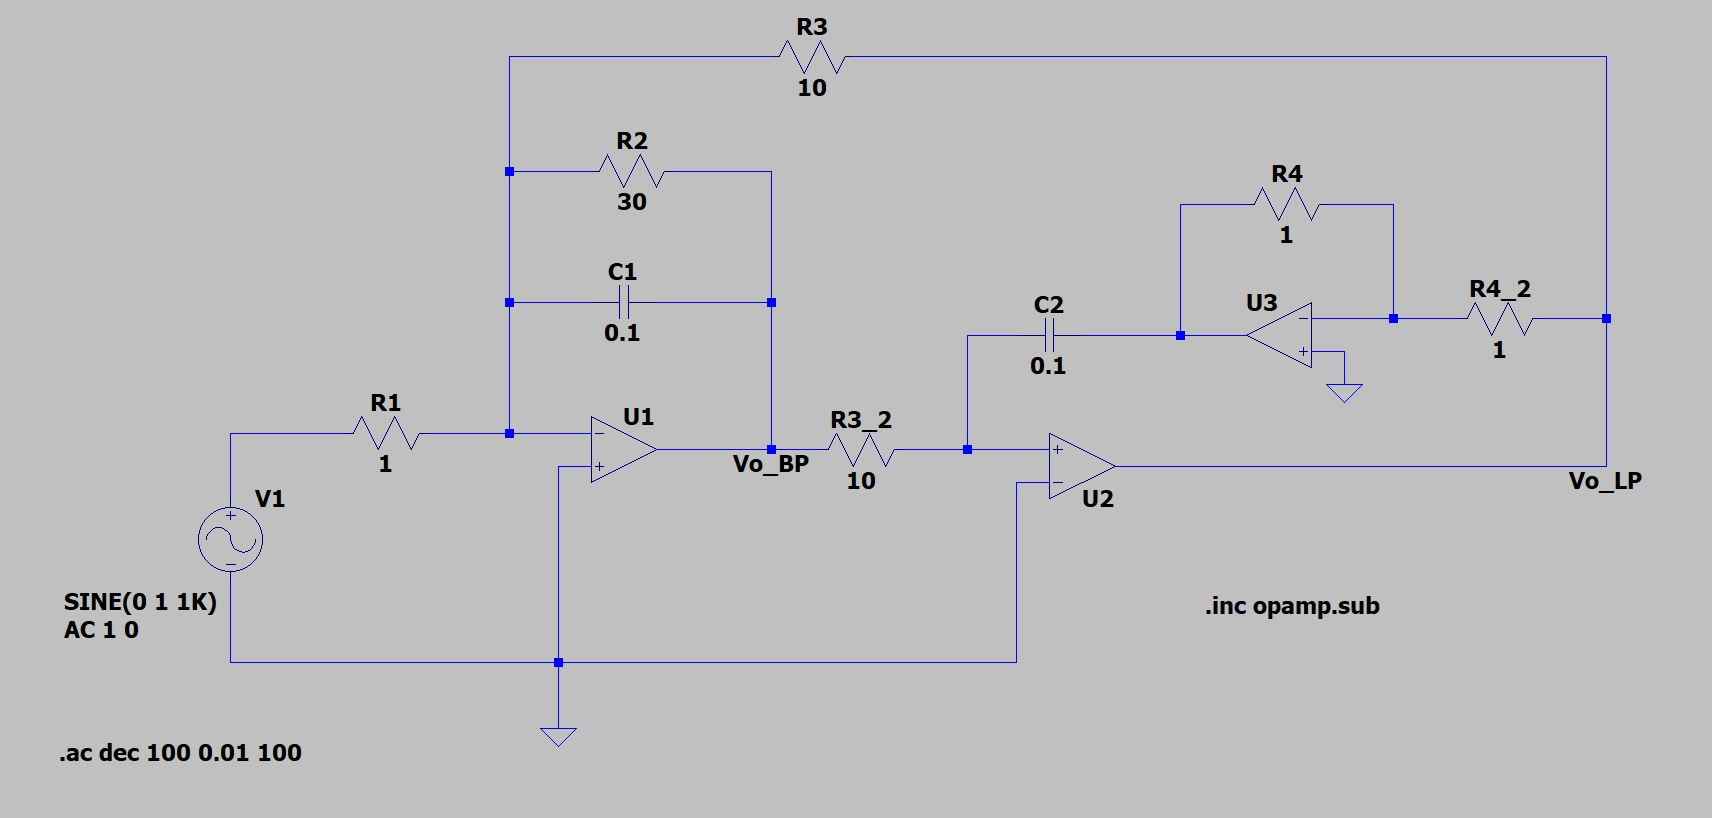

Se simula tanto en LTSpice como en Python para verificar que con los valores hallados de los componentes se cumpla con las condiciones propuestas de ganancia y frecuencia de corte, además se grafica el diagrama de polos y ceros que concuerda con el de un filtro pasa bajos.

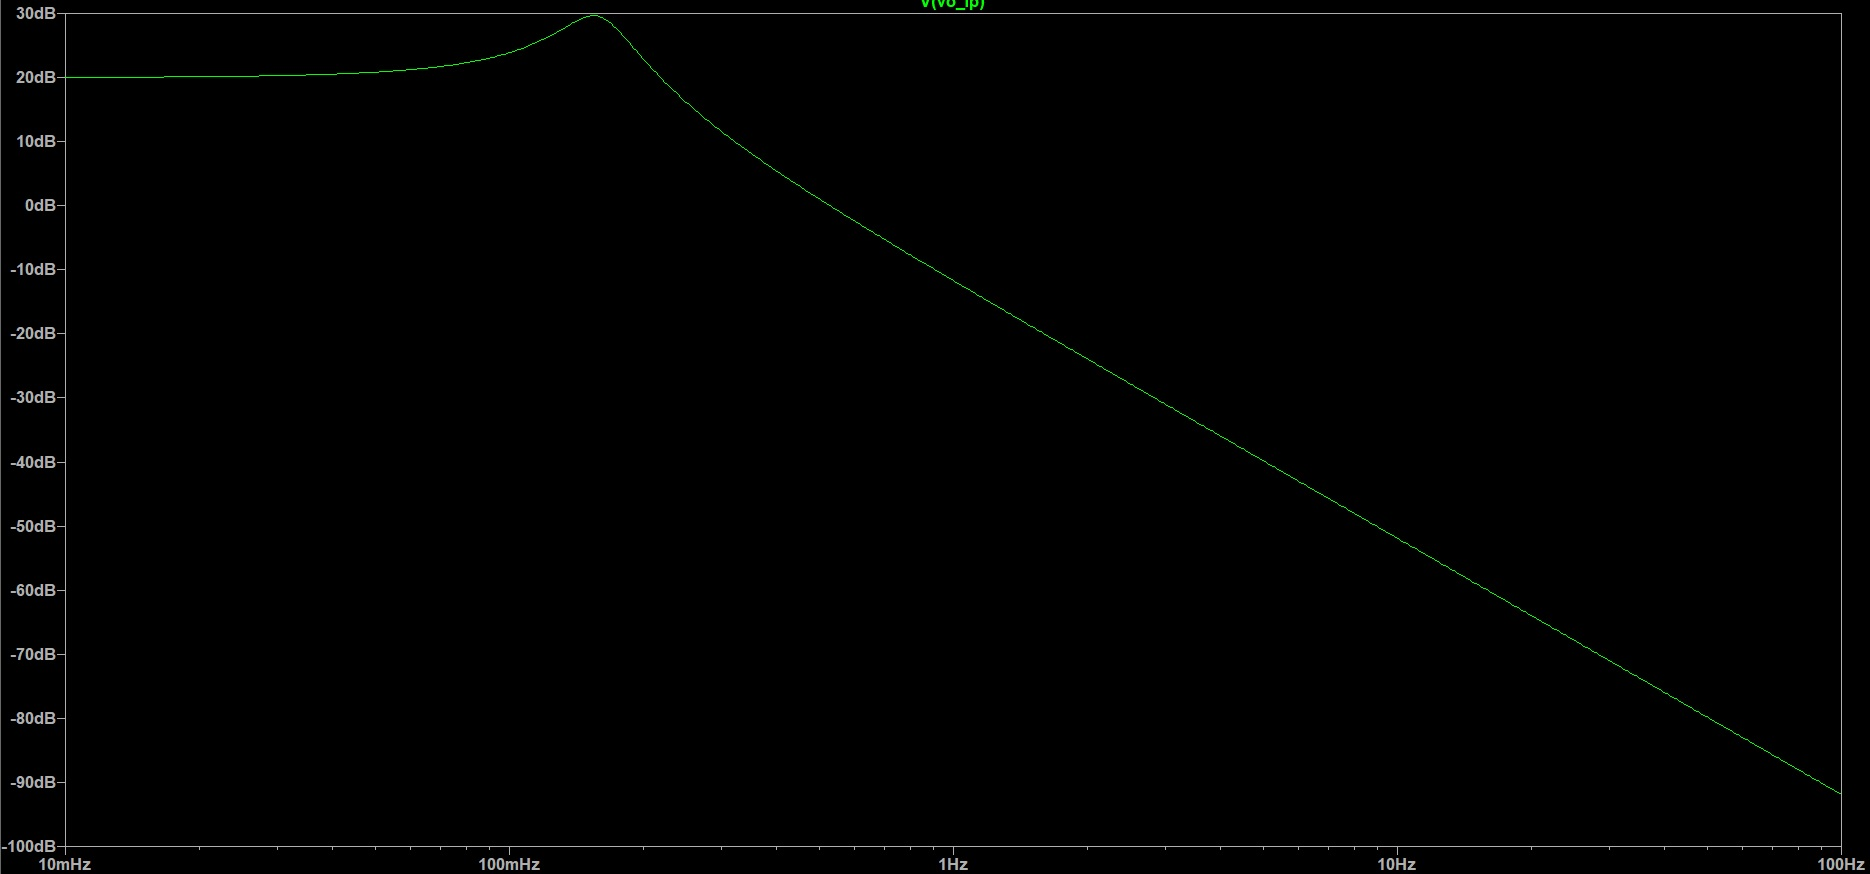

Efectivamente se cumple con lo solicitado. (Recordar que $\omega_c = 2\pi f_c$)


<IPython.core.display.Math object>

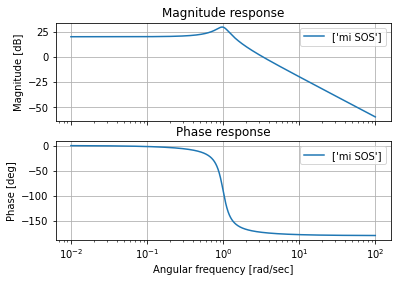

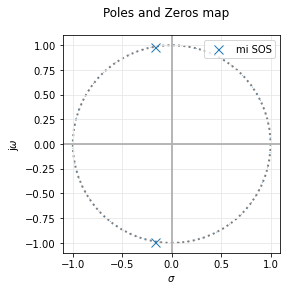

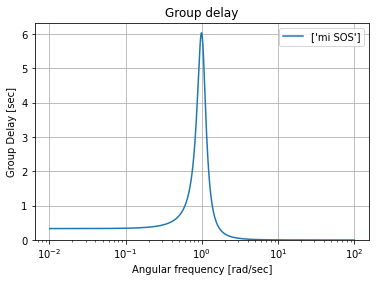

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq

wo = 1
qq = 3 

num = np.array([10*wo**2]) 
den = np.array([1, wo/qq, wo**2])

pretty_print_bicuad_omegayq(num,den)

mi_sos = sig.TransferFunction(num,den)
    
plt.close('all')
analyze_sys(mi_sos, 'mi SOS')

### Sensibilidad

$S_C^{ω𝑜} = \frac{C}{\omega_o}\frac{\partial\omega_o}{\partial C} = -1$ (Esto implica que hay una relación inversa entre la capacidad de los capacitores y la frecuencia de corte del sistema, si hay una variación en la capacitancia debido a la tolerancia puede variar la frecuencia de corte).

$S_{R_2}^{Q} = \frac{R_2}{Q}\frac{\partial Q}{\partial R_2} = 1$ (Ademas de lo dicho anteriormente sobre la tolerancia, utilizamos a $R_2$ para ajustar el Q del sistema)

$S_{R_3}^{Q} = \frac{R_3}{Q}\frac{\partial Q}{\partial R_3} = -1$ (En este caso si bien al variar $ R_3 $ también modificamos el Q, lo mejor sería dejarlo fijo y ajustar el Q sólamente con $ R_2 $ para lograr la ortogonalidad de parámetros).

### Butterworth

Por la forma de la función transferencia se considera al filtro un Butter de orden n=2, por lo tanto $ Q = \frac{1}{\sqrt{2}} $

Considerando los valores normalizados de los componentes ( $ R_1 = 1 , C = 0,1 \wedge R_3 = 10 $ y utilizando únicamente a $ R_2 $ para mover el Q nos queda la siguiente función transferencia:

$$ T_{(s)} = \frac{10}{s^2+\frac{10}{R_2}s+1} $$

Por lo tanto $\frac{10}{R_2} = \frac{1}{Q} $ , finalmente $R_2 = 5\sqrt{2}$ ($ R_2 $ normalizado)


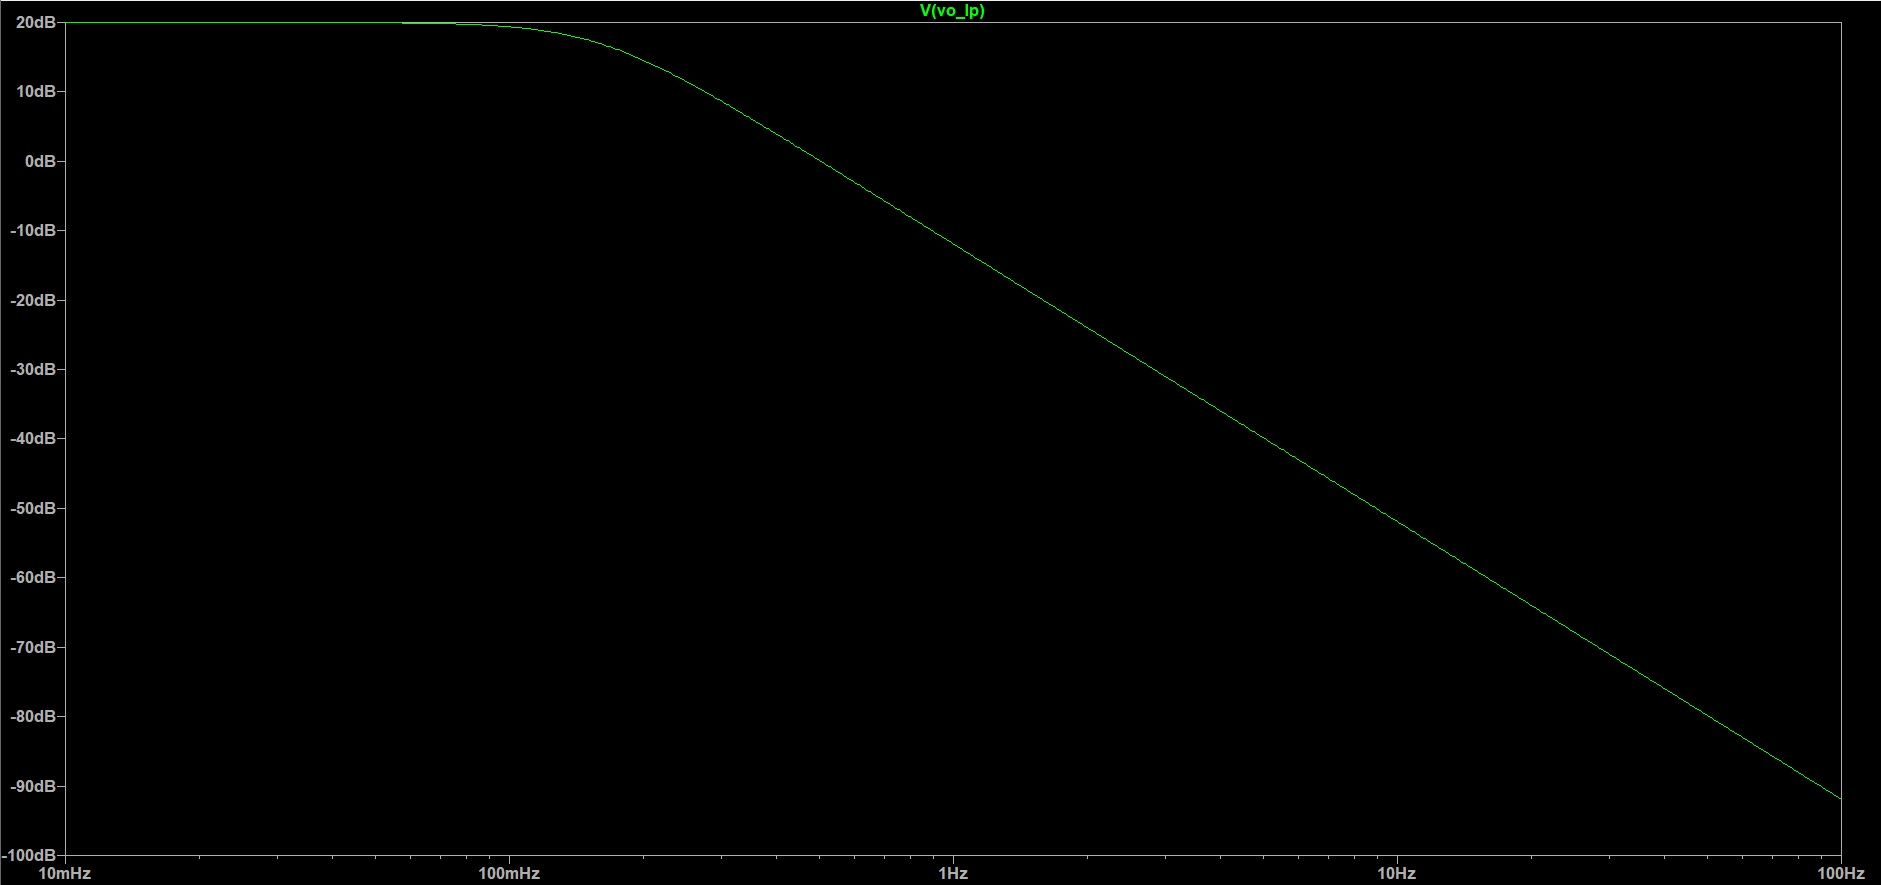

Se simuló el circuito con el ajuste de $ R_2 $ llevándolo al valor calculado y se pudo ver que efectivamente la respuesta en frecuencia corresponde al de un filtro de máxima planicidad.

### Conversión a filtro pasa-banda

Se toma a la salida del primer operacional como la salida del sistema y basándonos en las ecuaciones planteadas en el primer ejercicio llegamos a:

$$ \frac{V_{o_1}}{V_i} = - \frac{\frac{1}{R_1C}s}{s^2+\frac{1}{R_2C}s+\frac{1}{R_3^2C^2}} $$

Y los parámetros...

$\omega_o = \frac{1}{R_3C} , Q = \frac{R_2}{R_3} \wedge K = \frac{R_2}{R_1} $


Nuevamente utilizo el módulo Sympy para verificar el resultado obtenido...


In [6]:
Vi, Vo, Vo1 = sp.symbols("Vi, Vo, Vo1")
R1, R2, C, R3 = sp.symbols("R1, R2, C, R3")

aa = sp.solve([ 
                Vi/R1 + Vo1*(1/R2 + C) + Vo/R3, 
                Vo - Vo1/R3/C
                ], 
                [Vi, Vo1])

transf_func = aa[Vo1]/aa[Vi]

tf = transf_func.subs(C, s*C)

num, den = sp.fraction(sp.simplify(sp.expand(tf)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

tf_final = sp.Mul(k,num/den, evaluate=False)

print("La función transferencia es: ")
display(tf_final)

La función transferencia es: 


(-1/(C*R1))*(s/(s**2 + s/(C*R2) + 1/(C**2*R3**2)))

Se simuló para verificar que cambiando la salida del sistema se cambia la naturaleza del filtro:

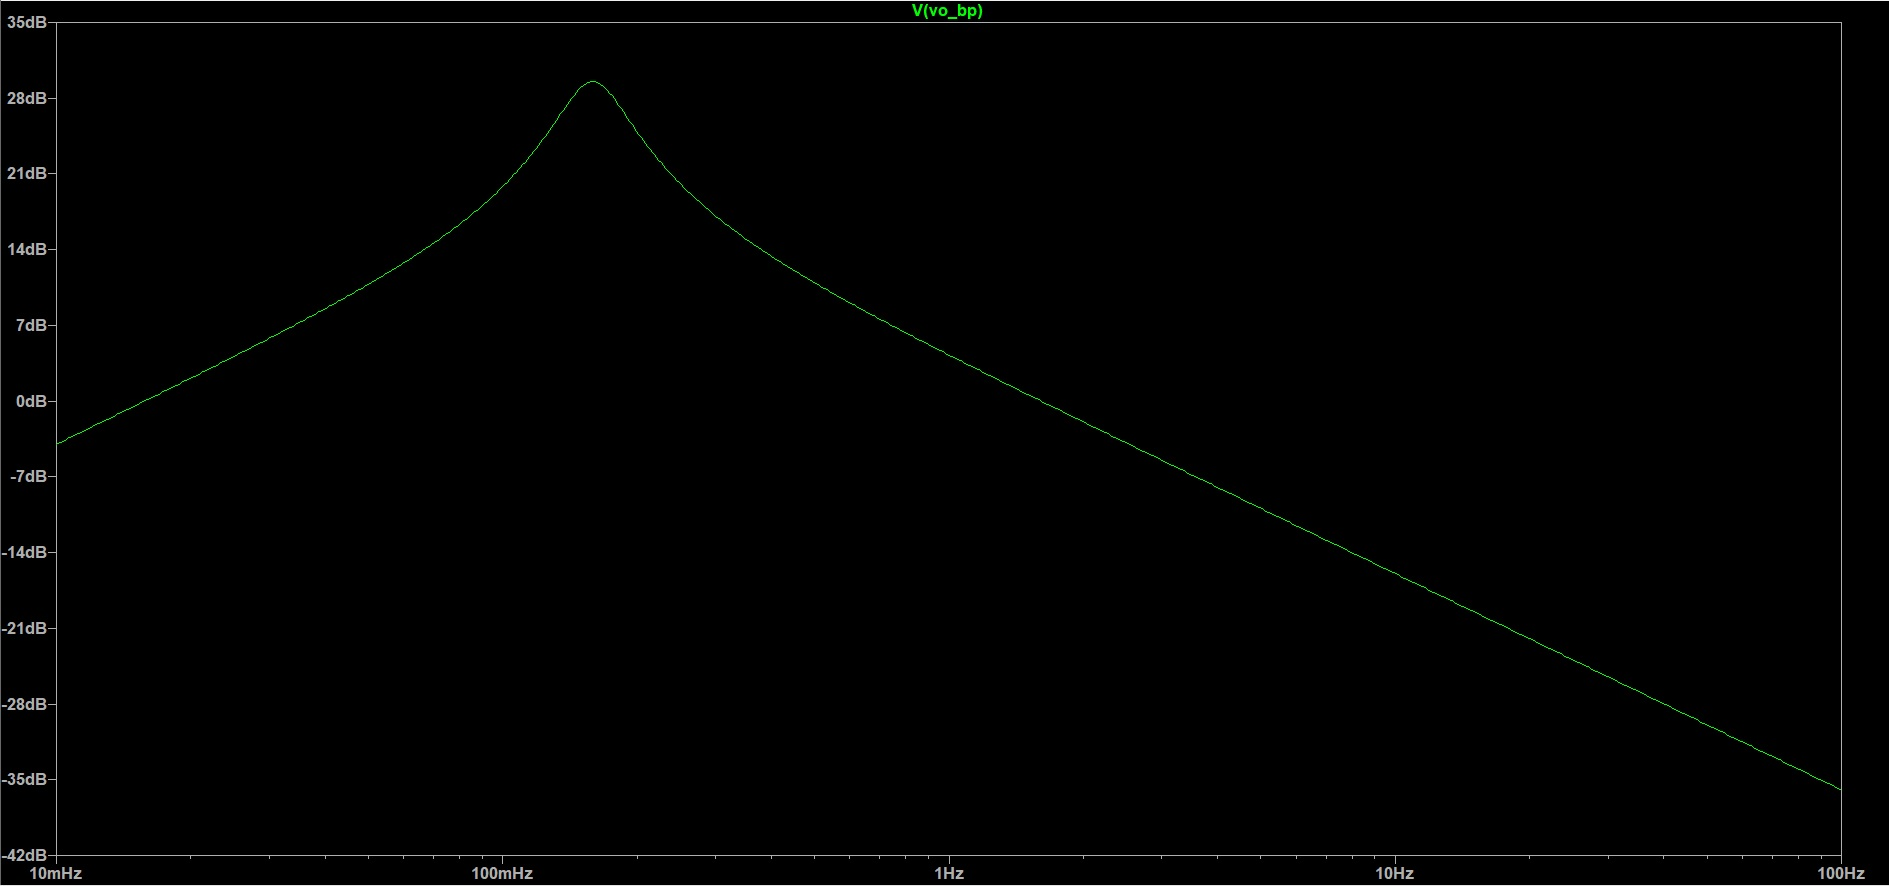

<IPython.core.display.Math object>

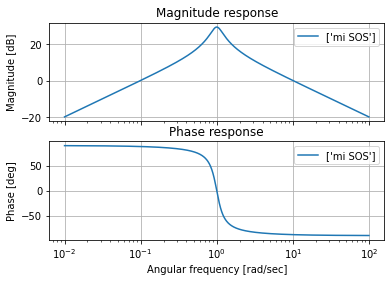

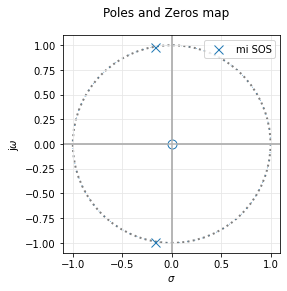

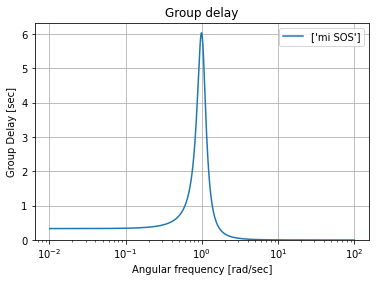

In [11]:
wo = 1
qq = 3 

num = np.array([30*wo/qq, 0]) 
den = np.array([1, wo/qq, wo**2])

pretty_print_bicuad_omegayq(num,den)

mi_sos = sig.TransferFunction(num,den)
    
plt.close('all')
analyze_sys(mi_sos, 'mi SOS')